In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/skin-cancer-malignant-vs-benign/data/test/malignant/1220.jpg
/kaggle/input/skin-cancer-malignant-vs-benign/data/test/malignant/238.jpg
/kaggle/input/skin-cancer-malignant-vs-benign/data/test/malignant/590.jpg
/kaggle/input/skin-cancer-malignant-vs-benign/data/test/malignant/562.jpg
/kaggle/input/skin-cancer-malignant-vs-benign/data/test/malignant/504.jpg
/kaggle/input/skin-cancer-malignant-vs-benign/data/test/malignant/592.jpg
/kaggle/input/skin-cancer-malignant-vs-benign/data/test/malignant/186.jpg
/kaggle/input/skin-cancer-malignant-vs-benign/data/test/malignant/1009.jpg
/kaggle/input/skin-cancer-malignant-vs-benign/data/test/malignant/1080.jpg
/kaggle/input/skin-cancer-malignant-vs-benign/data/test/malignant/1297.jpg
/kaggle/input/skin-cancer-malignant-vs-benign/data/test/malignant/1382.jpg
/kaggle/input/skin-cancer-malignant-vs-benign/data/test/malignant/893.jpg
/kaggle/input/skin-cancer-malignant-vs-benign/data/test/malignant/570.jpg
/kaggle/input/skin-cancer-maligna

In [2]:
import tensorflow as tf
from tensorflow.keras.applications.inception_v3 import InceptionV3
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

In [3]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255.
    
)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255.
)

train_generator = train_datagen.flow_from_directory(
    '../input/skin-cancer-malignant-vs-benign/train',
    class_mode='binary',
    target_size=(224,224)
)     


validation_generator =  test_datagen.flow_from_directory(
    '../input/skin-cancer-malignant-vs-benign/test',

    class_mode='binary',
    target_size=(224,224)
)

Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


In [4]:
pre_trained_model=InceptionV3(input_shape=(224, 224, 3),include_top=False,weights='imagenet')
for layer in pre_trained_model.layers:
  layer.trainable = False
pre_trained_model.summary()

87916544/87910968 [==============================] - 1s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________

In [5]:
x = tf.keras.layers.Flatten()(pre_trained_model.output)
x = tf.keras.layers.Dense(1024, activation=tf.nn.relu)(x)
x = tf.keras.layers.Dropout(.2)(x)                  
x = tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)(x)           
model = tf.keras.Model(pre_trained_model.input, x) 

model.compile(
    optimizer='adam', 
    loss='binary_crossentropy', 
    metrics=['acc']
)

model.summary()


Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [6]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs['acc']>0.95:
      print("\nReached 95% accuracy so cancelling training!")
      self.model.stop_training = True


In [7]:
callbacks = myCallback()
history = model.fit_generator(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    callbacks=[callbacks]
)

Epoch 1/10
83/83 [==============================] - 22s 260ms/step - loss: 7.5097 - acc: 0.7103 - val_loss: 1.3840 - val_acc: 0.7682
Epoch 2/10
83/83 [==============================] - 11s 132ms/step - loss: 0.4383 - acc: 0.8476 - val_loss: 0.4066 - val_acc: 0.8379
Epoch 3/10
83/83 [==============================] - 11s 132ms/step - loss: 0.2388 - acc: 0.8972 - val_loss: 0.4082 - val_acc: 0.8364
Epoch 4/10
83/83 [==============================] - 12s 145ms/step - loss: 0.1585 - acc: 0.9333 - val_loss: 0.4111 - val_acc: 0.8455
Epoch 5/10
83/83 [==============================] - 11s 132ms/step - loss: 0.1436 - acc: 0.9465 - val_loss: 0.4443 - val_acc: 0.8258
Epoch 6/10
83/83 [==============================] - ETA: 0s - loss: 0.0854 - acc: 0.9712
Reached 95% accuracy so cancelling training!
83/83 [==============================] - 11s 131ms/step - loss: 0.0854 - acc: 0.9712 - val_loss: 0.4642 - val_acc: 0.8409


Text(0.5, 1.0, 'Training and validation loss')

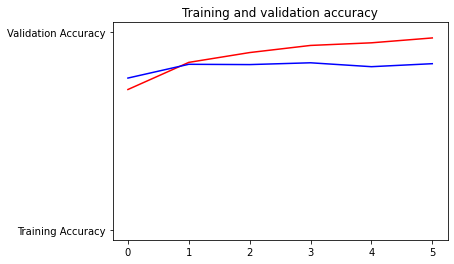

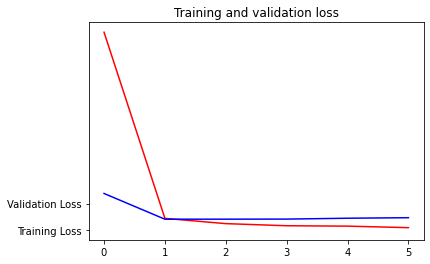

In [8]:



acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs


plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')



In [9]:
model.save('model_inception.h5')